In [8]:
import pandas as pd

# Load the dataset and list the columns
file_path = './Tweets.csv'
# Load only the relevant columns for the analysis
relevant_columns = ['airline', 'airline_sentiment', 'negativereason', 'text']
tweets_data = pd.read_csv(file_path, usecols=relevant_columns)

# Part A (1): Total count of data samples for each airline
airline_counts = tweets_data['airline'].value_counts()

# Part A (2): Unique values and most frequent value for specific columns
sentiment_stats = tweets_data['airline_sentiment'].value_counts()
negativereason_stats = tweets_data['negativereason'].value_counts()

# Part A (3): Lengths of the shortest and longest tweets
tweets_data['tweet_length'] = tweets_data['text'].str.len()
shortest_tweet_length = tweets_data['tweet_length'].min()
longest_tweet_length = tweets_data['tweet_length'].max()


# Displaying initial analysis results
{
    "Total_Count_Per_Airline": airline_counts,
    '===============':"====================" ,
    "Airline_Sentiment_Stats": sentiment_stats.describe(),
    "Negative_Reason_Stats": negativereason_stats.describe(),
    '-----------------------':"--------------------------------" ,
    "Shortest_Tweet_Length": shortest_tweet_length,
    "Longest_Tweet_Length": longest_tweet_length,
}



{'Total_Count_Per_Airline': United            3822
 US Airways        2913
 American          2759
 Southwest         2420
 Delta             2222
 Virgin America     504
 Name: airline, dtype: int64,
 '===============': '====================',
 'Airline_Sentiment_Stats': count       3.000000
 mean     4880.000000
 std      3740.324451
 min      2363.000000
 25%      2731.000000
 50%      3099.000000
 75%      6138.500000
 max      9178.000000
 Name: airline_sentiment, dtype: float64,
 'Negative_Reason_Stats': count      10.000000
 mean      917.800000
 std       840.582047
 min        74.000000
 25%       493.000000
 50%       652.000000
 75%      1104.250000
 max      2910.000000
 Name: negativereason, dtype: float64,
 '-----------------------': '--------------------------------',
 'Shortest_Tweet_Length': 12,
 'Longest_Tweet_Length': 186}

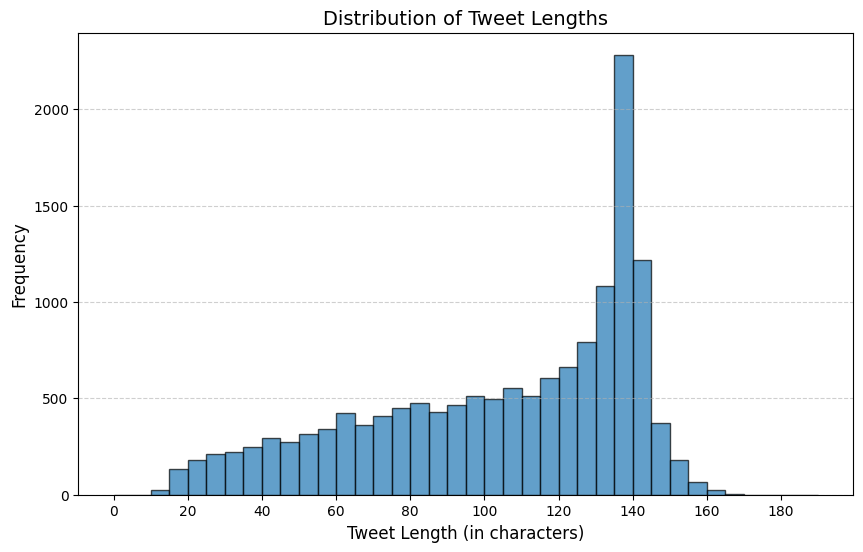

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create bins for the histogram (5-character intervals)
max_length = int(np.ceil(longest_tweet_length / 5.0) * 5)  # Round up to nearest multiple of 5
bins = np.arange(0, max_length + 5, 5)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(tweets_data['tweet_length'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribution of Tweet Lengths', fontsize=14)
plt.xlabel('Tweet Length (in characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(np.arange(0, max_length + 5, 20))  # Add ticks at intervals of 20 for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# Prepare the data for plotting
airlines = tweets_data['airline'].unique()
sentiments = ['positive', 'neutral', 'negative']

# Set up the grid for the plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True, sharex=True)
colors = ['green', 'blue', 'red']

# Plot sentiment distribution for each airline
for i, airline in enumerate(airlines):
    ax = axes[i // 3, i % 3]
    airline_data = tweets_data[tweets_data['airline'] == airline]
    sentiment_counts = airline_data['airline_sentiment'].value_counts()
    
    # Ensure the order of sentiments is consistent
    sentiment_counts = sentiment_counts.reindex(sentiments, fill_value=0)
    
    ax.bar(sentiments, sentiment_counts, color=colors, edgecolor='black', alpha=0.7)
    ax.set_title(airline, fontsize=12)
    ax.set_xlabel('Sentiment', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

# Adjust layout and add a global legend
fig.suptitle('Tweet Sentiment Distribution per Airline', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='black') for color in colors]
fig.legend(handles, sentiments, loc='upper center', ncol=3, fontsize=12)
plt.show()


In [4]:
import re

def custom_tokenizer(text):
    # Define tokenization rules using regex
    rules = [
        (r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "URL"),  # URLs
        (r"\b\w+@\w+\.\w+\b", "EMAIL"),  # Emails
        (r"(\d+)([a-zA-Z]+)", r"\1 \2"),  # Split numbers and letters
        (r"([a-zA-Z]+)(\d+)", r"\1 \2"),  # Split letters and numbers
        (r"([.,!?;:])", r" \1 "),  # Split punctuation
        (r"'\b", " ' "),  # Handle contractions (e.g., don't -> do n't)
        (r"\s+", " "),  # Remove extra spaces
    ]
    
    # Apply each rule sequentially
    for pattern, repl in rules:
        text = re.sub(pattern, repl, text)
    
    # Split by space for final tokens
    tokens = text.strip().split(" ")
    return tokens

# Test the tokenizer
sample_text = "Hello, world! It's 2024 and AI-driven NLP is exciting. Contact us at info@example.com or visit https://example.com."
tokens = custom_tokenizer(sample_text)

print("Original text:", sample_text)
print("Tokenized text:", tokens)


Original text: Hello, world! It's 2024 and AI-driven NLP is exciting. Contact us at info@example.com or visit https://example.com.
Tokenized text: ['Hello', ',', 'world', '!', 'It', "'", 's', '2024', 'and', 'AI-driven', 'NLP', 'is', 'exciting', '.', 'Contact', 'us', 'at', 'EMAIL', 'or', 'visit', 'URL']


In [7]:
import re
from nltk.tokenize import word_tokenize

# Redefine the custom tokenizer
def custom_tokenizer(text):
    # Define tokenization rules using regex
    rules = [
        (r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "URL"),  # URLs
        (r"\b\w+@\w+\.\w+\b", "EMAIL"),  # Emails
        (r"(\d+)([a-zA-Z]+)", r"\1 \2"),  # Split numbers and letters
        (r"([a-zA-Z]+)(\d+)", r"\1 \2"),  # Split letters and numbers
        (r"([.,!?;:])", r" \1 "),  # Split punctuation
        (r"\b'\b", " ' "),  # Handle contractions (e.g., don't -> do n't)
        (r"\s+", " "),  # Remove extra spaces
        (r"@(\w+)", r"\1"), # Remove '@' but keep the username
        (r"#(\w+)", r"\1")  # Remove '@' but keep the username
    ]
    
    # Apply each rule sequentially
    for pattern, repl in rules:
        text = re.sub(pattern, repl, text)
    
    # Split by space for final tokens
    tokens = text.strip().split(" ")
    return tokens

# Function to compare custom tokenizer with NLTK's tokenizer
def compare_tokenizers(text, custom_tokens, nltk_tokens):
    differences = {
        "custom": [token for token in custom_tokens if token not in nltk_tokens],
        "nltk": [token for token in nltk_tokens if token not in custom_tokens],
    }
    return differences

# Pick 5 sample texts from the dataset
sample_texts = tweets_data['text'].sample(5, random_state=42).tolist()

# Analyze and save differences for each sample
output_lines = []
for i, text in enumerate(sample_texts, start=1):
    custom_tokens = custom_tokenizer(text)
    nltk_tokens = word_tokenize(text)
    differences = compare_tokenizers(text, custom_tokens, nltk_tokens)

    output_lines.append(f"Example {i}:")
    output_lines.append(f"Original Text: {text}")
    output_lines.append(f"Custom Tokenizer Output: {custom_tokens}")
    output_lines.append(f"NLTK Tokenizer Output: {nltk_tokens}")
    output_lines.append(f"Differences (Custom only): {differences['custom']}")
    output_lines.append(f"Differences (NLTK only): {differences['nltk']}")
    output_lines.append("")

# Write a paragraph describing differences
description = (
    "The custom tokenizer uses predefined rules for specific patterns, such as splitting punctuation, "
    "handling contractions, and separating numbers from letters. On the other hand, NLTK's word tokenizer "
    "follows a more generalized approach, often keeping certain patterns intact, like 'don't'. "
    "This leads to differences, especially in edge cases like URLs, email addresses, and custom-defined tokenization rules."
)
output_lines.append(description)

# Save the results and paragraph to a text file
output_file_path = './tokenizer_comparison_results.txt'
with open(output_file_path, 'w') as f:
    f.write("\n".join(output_lines))

output_file_path


'./tokenizer_comparison_results.txt'

In [13]:
import re
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define contractions for expansion
contractions = {"don't": "do not", "can't": "cannot", "i'm": "i am"}

# Function for data cleaning
def clean_text(text):
    # 1. Remove mentions
    text = re.sub(r"@\w+", "", text)
    # 2. Remove URLs
    text = re.sub(r"http[s]?://\S+", "", text)
    # 3. Remove email addresses
    text = re.sub(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b", "", text)
    # 4. Remove currency values
    text = re.sub(r"\$\d+(?:\.\d{2})?", "", text)
    # 5. Remove emojis
    text = re.sub(r"[^\w\s,]", "", text, flags=re.UNICODE)
    # 6. Remove HTML escaped characters
    text = re.sub(r"&[a-z]+;", "", text)
    # 7. Normalize times & dates
    text = re.sub(r"\b\d{1,2}[:/]\d{1,2}(?:\s?[APMapm]+)?\b", "", text)
    # 8. Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # 9. Remove Chinese characters
    text = re.sub(r"[\u4e00-\u9fff]", "", text)
    # 10. Expand contractions
    text = " ".join([contractions[word] if word in contractions else word for word in text.split()])
    # 11. Remove consecutive repeating characters
    text = re.sub(r"(.)\1{2,}", r"\1", text)
    # 12. Remove words that are too short or too long
    text = " ".join([word for word in text.split() if 2 <= len(word) <= 15])
    # 13. Apply lemmatization
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    # 14. Remove extra whitespaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Clean the dataset
tweets_data['cleaned_text'] = tweets_data['text'].apply(clean_text)

# Remove duplicates and empty rows
tweets_data = tweets_data.drop_duplicates(subset=['cleaned_text', 'airline_sentiment'])
tweets_data = tweets_data[tweets_data['cleaned_text'] != ""]

# Save the cleaned dataset
cleaned_file_path = './cleaned_tweets.csv'
tweets_data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to: {cleaned_file_path}")


Cleaned data saved to: ./cleaned_tweets.csv


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
file_path = './cleaned_tweets.csv'
tweets_data = pd.read_csv(file_path)

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    tweets_data['cleaned_text'], 
    tweets_data['airline_sentiment'], 
    test_size=0.1, 
    random_state=3, 
    stratify=tweets_data['airline_sentiment']  # Ensure class distribution is preserved
)

# Print class distribution
print("Training set class distribution:")
print(train_labels.value_counts())
print("\nTest set class distribution:")
print(test_labels.value_counts())


Training set class distribution:
negative    8170
neutral     2663
positive    1995
Name: airline_sentiment, dtype: int64

Test set class distribution:
negative    908
neutral     296
positive    222
Name: airline_sentiment, dtype: int64


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train = tfidf.fit_transform(train_data)
X_test = tfidf.transform(test_data)


In [16]:
from sklearn.linear_model import SGDClassifier

# Initialize the model
svm_model = SGDClassifier(
    loss="hinge",
    penalty="l2",
    alpha=1e-4,
    max_iter=100,
    tol=None,
    shuffle=True,
    random_state=3
)

# Train the model
svm_model.fit(X_train, train_labels)


SGDClassifier(max_iter=100, random_state=3, tol=None)

In [17]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train, train_labels, cv=10, scoring="accuracy")

# Calculate mean validation accuracy
validation_accuracy = cv_scores.mean()
print(f"10-Fold Cross-Validation Accuracy: {validation_accuracy:.4f}")


10-Fold Cross-Validation Accuracy: 0.8009


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test data
test_predictions = svm_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(test_labels, test_predictions))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, test_predictions))


Test Set Accuracy: 0.8114

Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.94      0.89       908
     neutral       0.68      0.51      0.58       296
    positive       0.81      0.69      0.75       222

    accuracy                           0.81      1426
   macro avg       0.78      0.71      0.74      1426
weighted avg       0.80      0.81      0.80      1426


Confusion Matrix:
[[851  44  13]
 [120 152  24]
 [ 40  28 154]]


In [24]:
import optuna
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Initialize lemmatizer and contractions
lemmatizer = WordNetLemmatizer()
contractions = {"don't": "do not", "can't": "cannot", "i'm": "i am"}

# Define a cleaning function with toggleable options
def clean_text_variant(
    text, remove_mentions=True, remove_urls=True, lemmatize=True, expand_contractions=True
):
    text = re.sub(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b", "", text)  # Remove emails
    text = re.sub(r"\$\d+(?:\.\d{2})?", "", text)  # Remove currency
    text = re.sub(r"[^\w\s,]", "", text, flags=re.UNICODE)  # Remove emojis
    text = re.sub(r"&[a-z]+;", "", text)  # Remove HTML escaped chars
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"[\u4e00-\u9fff]", "", text)  # Remove Chinese characters
    if remove_mentions:
        text = re.sub(r"@\w+", "", text)  # Remove mentions
    if remove_urls:
        text = re.sub(r"http[s]?://\S+", "", text)  # Remove URLs
    if expand_contractions:
        text = " ".join([contractions[word] if word in contractions else word for word in text.split()])
    text = re.sub(r"(.)\1{2,}", r"\1", text)  # Remove repeated characters
    text = " ".join([word for word in text.split() if 2 <= len(word) <= 15])  # Limit word length
    if lemmatize:
        text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatize
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Load dataset
file_path = './cleaned_tweets.csv'
tweets_data = pd.read_csv(file_path)

# Store detailed results for all combinations
detailed_results = []

# Define the optimization objective
def objective(trial):
    # Suggest cleaning steps
    remove_mentions = trial.suggest_categorical("remove_mentions", [True, False])
    remove_urls = trial.suggest_categorical("remove_urls", [True, False])
    lemmatize = trial.suggest_categorical("lemmatize", [True, False])
    expand_contractions = trial.suggest_categorical("expand_contractions", [True, False])
    
    # Apply cleaning with the suggested configuration
    tweets_data['variant_cleaned_text'] = tweets_data['text'].apply(
        lambda x: clean_text_variant(
            x,
            remove_mentions=remove_mentions,
            remove_urls=remove_urls,
            lemmatize=lemmatize,
            expand_contractions=expand_contractions,
        )
    )
    
    # TF-IDF vectorization
    tfidf = TfidfVectorizer(max_features=5000)
    X = tfidf.fit_transform(tweets_data['variant_cleaned_text'])
    y = tweets_data['airline_sentiment']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=3, stratify=y
    )
    
    # Train a model
    svm_model = SGDClassifier(
        loss="hinge", penalty="l2", alpha=1e-4, max_iter=100, tol=None, shuffle=True, random_state=3
    )
    svm_model.fit(X_train, y_train)
    
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(svm_model, X_train, y_train, cv=10, scoring="accuracy")
    mean_accuracy = cv_scores.mean()
    
    # Evaluate on the test set
    y_pred = svm_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Store detailed results
    detailed_results.append({
        "trial_params": trial.params,
        "cross_val_accuracy": mean_accuracy,
        "test_accuracy": test_accuracy,
        "classification_report": report,
        "confusion_matrix": confusion,
    })
    
    return mean_accuracy

# Use Optuna to optimize
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=256, n_jobs=-1)

# Display the best results
best_trial = study.best_trial
best_params = best_trial.params

print("\nBest Cleaning Steps:")
print(best_params)
print(f"Best Cross-Validation Accuracy: {study.best_value:.4f}")

# Extract the best trial's detailed results
best_result = next(
    res for res in detailed_results if res["trial_params"] == best_params
)
print("\nBest Test Set Accuracy:")
print(best_result["test_accuracy"])
print("\nBest Classification Report:")
print(pd.DataFrame(best_result["classification_report"]).T)
print("\nBest Confusion Matrix:")
print(best_result["confusion_matrix"])


[I 2024-11-21 19:59:01,588] A new study created in memory with name: no-name-1292b098-1ede-4d1c-9044-4eb77e075673
[I 2024-11-21 19:59:45,895] Trial 8 finished with value: 0.7992660532609925 and parameters: {'remove_mentions': True, 'remove_urls': False, 'lemmatize': False, 'expand_contractions': False}. Best is trial 8 with value: 0.7992660532609925.
[I 2024-11-21 19:59:59,492] Trial 9 finished with value: 0.8025395700161599 and parameters: {'remove_mentions': False, 'remove_urls': True, 'lemmatize': True, 'expand_contractions': False}. Best is trial 9 with value: 0.8025395700161599.
[I 2024-11-21 20:00:21,278] Trial 16 finished with value: 0.7992660532609925 and parameters: {'remove_mentions': False, 'remove_urls': True, 'lemmatize': False, 'expand_contractions': False}. Best is trial 9 with value: 0.8025395700161599.
[I 2024-11-21 20:00:23,300] Trial 7 finished with value: 0.7992660532609925 and parameters: {'remove_mentions': False, 'remove_urls': False, 'lemmatize': False, 'expand_


Best Cleaning Steps:
{'remove_mentions': False, 'remove_urls': True, 'lemmatize': True, 'expand_contractions': False}
Best Cross-Validation Accuracy: 0.8025

Best Test Set Accuracy:
0.8092566619915849

Best Classification Report:
              precision    recall  f1-score      support
negative       0.841223  0.939427  0.887617   908.000000
neutral        0.672566  0.513514  0.582375   296.000000
positive       0.801075  0.671171  0.730392   222.000000
accuracy       0.809257  0.809257  0.809257     0.809257
macro avg      0.771622  0.708037  0.733462  1426.000000
weighted avg   0.799964  0.809257  0.799780  1426.000000

Best Confusion Matrix:
[[853  43  12]
 [119 152  25]
 [ 42  31 149]]


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and contractions
lemmatizer = WordNetLemmatizer()
contractions = {"don't": "do not", "can't": "cannot", "i'm": "i am"}

# Define the cleaning function with the best parameters
def clean_text_variant(
    text, remove_mentions=False, remove_urls=True, lemmatize=True, expand_contractions=False
):
    if remove_mentions:
        text = re.sub(r"@\w+", "", text)  # Remove mentions
    if remove_urls:
        text = re.sub(r"http[s]?://\S+", "", text)  # Remove URLs
    text = re.sub(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b", "", text)  # Remove emails
    text = re.sub(r"\$\d+(?:\.\d{2})?", "", text)  # Remove currency
    text = re.sub(r"[^\w\s,]", "", text, flags=re.UNICODE)  # Remove emojis
    text = re.sub(r"&[a-z]+;", "", text)  # Remove HTML escaped chars
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"[\u4e00-\u9fff]", "", text)  # Remove Chinese characters
    if expand_contractions:
        text = " ".join([contractions[word] if word in contractions else word for word in text.split()])
    text = re.sub(r"(.)\1{2,}", r"\1", text)  # Remove repeated characters
    text = " ".join([word for word in text.split() if 2 <= len(word) <= 15])  # Limit word length
    if lemmatize:
        text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatize
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Load dataset
file_path = './cleaned_tweets.csv'
tweets_data = pd.read_csv(file_path)

# Apply the best cleaning steps
tweets_data['cleaned_text'] = tweets_data['text'].apply(clean_text_variant)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(tweets_data['cleaned_text'])
y = tweets_data['airline_sentiment']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=3, stratify=y
)

# Train a model
svm_model = SGDClassifier(
    loss="hinge", penalty="l2", alpha=1e-4, max_iter=100, tol=None, shuffle=True, random_state=3
)
svm_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=False)
confusion = confusion_matrix(y_test, y_pred)

# Output results
print(f"Test Set Accuracy: {test_accuracy:.6f}\n")
print("Classification Report:")
print(report)
print("\nConfusion Matrix:")
print(confusion)


Test Set Accuracy: 0.809958

Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.94      0.89       908
     neutral       0.67      0.51      0.58       296
    positive       0.81      0.68      0.74       222

    accuracy                           0.81      1426
   macro avg       0.77      0.71      0.73      1426
weighted avg       0.80      0.81      0.80      1426


Confusion Matrix:
[[853  44  11]
 [119 152  25]
 [ 41  31 150]]


In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
from nltk.stem import WordNetLemmatizer

# Load the dataset
file_path = './Tweets.csv'
tweets_data = pd.read_csv(file_path)

# 1. Find number of unique users and compute top-5 words from their tweets using TF-IDF
unique_users = tweets_data['name'].nunique()
print(f"Number of unique users: {unique_users}")

# Create a dictionary to store top-5 words for each user
user_top_words = {}
for user in tweets_data['name'].unique():
    user_tweets = tweets_data[tweets_data['name'] == user]['text']
    if not user_tweets.empty:
        tfidf = TfidfVectorizer(stop_words='english', max_features=5)
        tfidf_matrix = tfidf.fit_transform(user_tweets)
        top_words = tfidf.get_feature_names_out()
        user_top_words[user] = top_words

# 2. For each airline, find the most active users and their details
# 2. For each airline, find the most active users and their details
most_active_users_per_airline = {}
for airline in tweets_data['airline'].unique():
    airline_data = tweets_data[tweets_data['airline'] == airline]
    most_active_user = airline_data['name'].value_counts().idxmax()
    user_tweets = airline_data[airline_data['name'] == most_active_user]
    user_details = {
        "tweets": user_tweets['text'].tolist(),
        "locations": user_tweets['tweet_location'].tolist(),
        "sentiments": user_tweets['airline_sentiment'].tolist()
    }
    most_active_users_per_airline[airline] = {
        "user": most_active_user,
        "details": user_details
    }

# Display a sample result in a specific format
most_active_users_sample = {airline: details for airline, details in list(most_active_users_per_airline.items())[:3]}

# Print in the required format
for airline, info in most_active_users_sample.items():
    print(f"Airline: {airline}")
    print(f"  Most Active User: {info['user']}")
    print(f"  Tweets:")
    for tweet, location, sentiment in zip(
        info['details']['tweets'],  # Displaying first 5 tweets for brevity
        info['details']['locations'],
        info['details']['sentiments']
    ):
        print(f"    - {tweet}")
        print(f"    - {location}")
        print(f"    - {sentiment}")
        print()

# 3. Find missing values in 'tweet_location' and 'user_timezone'
missing_tweet_location = tweets_data['tweet_location'].isnull().sum()
missing_user_timezone = tweets_data['user_timezone'].isnull().sum()
print(f"Missing values in 'tweet_location': {missing_tweet_location}")
print(f"Missing values in 'user_timezone': {missing_user_timezone}")
tweets_data_cleaned = tweets_data.dropna(subset=['tweet_location', 'user_timezone'])

# 4. Parse 'tweet_created' as a date
tweets_data_cleaned['tweet_created'] = pd.to_datetime(tweets_data_cleaned['tweet_created'], errors='coerce')
print(f"tweet_created type: {tweets_data_cleaned['tweet_created'].dtype}")

# 5. Find tweets from Philadelphia with variations in spelling
philadelphia_variations = [
    "Philadelphia", "philadelphia", "Phila", "Philly", "philly",
    "Phildelphia", "Phildelhia", "Philadephia", "Philadelpia", "Philadlephia"
]
philadelphia_tweets = tweets_data_cleaned[
    tweets_data_cleaned['tweet_location'].str.contains('|'.join(philadelphia_variations), na=False, case=False)
]
total_philadelphia_tweets = philadelphia_tweets.shape[0]
unique_variations = philadelphia_tweets['tweet_location'].str.lower().unique()
print(f"Total Philadelphia tweets: {total_philadelphia_tweets}")
print(f"Unique variations: {unique_variations}")

# 6. Create a subset with 'airline_sentiment_confidence' > 0.6
confidence_subset = tweets_data_cleaned[tweets_data_cleaned['airline_sentiment_confidence'] > 0.6]
subset_file_path = './airline_sentiment_confidence_above_0_6.csv'
confidence_subset.to_csv(subset_file_path, index=False)
print(f"Subset saved to: {subset_file_path}, Total rows: {confidence_subset.shape[0]}")


Number of unique users: 7701
Airline: Virgin America
  Most Active User: wmrrock
  Tweets:
    - @VirginAmerica cool picture of another VirginAmerica plane off our wing. What a site! http://t.co/5B2agFd8c4
    - CT
    - positive

    - @VirginAmerica seats in Row 8 don't recline should mention that on your website #soreback
    - CT
    - negative

    - @VirginAmerica flight 404 delayed 2 hours in LA due to mechanical problems. Handle like pros but you could have tossed us a free drink.
    - CT
    - negative

    - @VirginAmerica on VX399 from JFK to LA - dirty plane - not up to your standards.
    - CT
    - negative

    - @VirginAmerica on flight VX399 headed to LA from JFK - dirtiest VA plane I have ever been on. Sad for a great airline.
    - CT
    - negative

    - @VirginAmerica You should still develop an app - then you will be my favorite airline.
    - CT
    - neutral

    - @VirginAmerica got it. All set - Thanks!
    - CT
    - positive

    - @VirginAmerica Only thin

C:\Users\USER\AppData\Local\Temp\ipykernel_13320\2459484260.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data_cleaned['tweet_created'] = pd.to_datetime(tweets_data_cleaned['tweet_created'], errors='coerce')


In [32]:
output_file_path = './most_active_users_sample.txt'

with open(output_file_path, 'w', encoding='utf-8') as file:
    for airline, info in most_active_users_sample.items():
        file.write(f"Airline: {airline}\n")
        file.write(f"  Most Active User: {info['user']}\n")
        file.write(f"  Tweets:\n")
        for tweet, location, sentiment in zip(
            info['details']['tweets'],  # Displaying first 5 tweets for brevity
            info['details']['locations'],
            info['details']['sentiments']
        ):
            file.write(f"    - {tweet}\n")
            file.write(f"    - {location}\n")
            file.write(f"    - {sentiment}\n\n")

# output_file_path